## This code explore the Modern Portfolio Theory (Markowitz model) to optimize asset allocation.
**I used 20 major NIFTY & SENSEX Stocks**
**Risk free Rate = 6.47%**
**Using Aquan ToolBox to Get Data**

In [1]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import seaborn as sns
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pip install -U auquan_toolbox

     |████████████████████████████████| 103 kB 5.5 MB/s 
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=58e223b84c0824cd21887b60110848af27109543edfb8834f3c5ceba899f9968
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource
from datetime import datetime

startDateStr = '2011/01/01'
endDateStr = '2020/07/01'
cachedFolderName = 'yahooData/'
dataSetId = 'testPairsTrading'

## Add Tickers here for your portofolio

In [4]:
instrumentIds = ['ASIANPAINT.NS', 'AXISBANK.NS', 'BAJFINANCE.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'HCLTECH.NS',
                'HDFC.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'KOTAKBANK.NS',
                'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'NESTLEIND.NS']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')

Processing data for stock: ASIANPAINT.NS
Processing data for stock: AXISBANK.NS
Processing data for stock: BAJFINANCE.NS
Processing data for stock: BAJAJ-AUTO.NS
Processing data for stock: BAJAJFINSV.NS
Processing data for stock: BHARTIARTL.NS
Processing data for stock: HCLTECH.NS
Processing data for stock: HDFC.NS
Processing data for stock: HDFCBANK.NS
Processing data for stock: HINDUNILVR.NS
Processing data for stock: ICICIBANK.NS
Processing data for stock: INDUSINDBK.NS
Processing data for stock: INFY.NS
Processing data for stock: ITC.NS
Processing data for stock: KOTAKBANK.NS
Processing data for stock: LT.NS
Processing data for stock: M&M.NS
Processing data for stock: MARUTI.NS
Processing data for stock: NTPC.NS
Processing data for stock: NESTLEIND.NS
20% done...
40% done...
60% done...
80% done...


In [5]:
data = ds.getBookDataByFeature()['adjClose']
data.iloc[-5:]

,ASIANPAINT.NS,AXISBANK.NS,BAJFINANCE.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BHARTIARTL.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NTPC.NS,NESTLEIND.NS
2020-06-24,1747.250000,424.649994,2934.449951,2817.250000,6046.049805,557.349976,559.599976,1758.507935,1032.500000,2130.300049,348.100006,481.700012,714.150024,182.467789,1343.900024,955.549988,515.349976,5755.350098,97.050003,16707.900391
2020-06-25,1689.000000,421.700012,3005.350098,2820.449951,6021.149902,559.000000,550.049988,1738.993530,1028.750000,2173.149902,351.000000,475.149994,700.500000,192.216537,1381.699951,943.099976,507.250000,5762.299805,96.099998,16787.000000
2020-06-26,1686.750000,424.850006,2903.500000,2867.600098,5946.299805,560.400024,562.400024,1730.727783,1056.449951,2154.199951,349.100006,492.549988,748.200012,185.653961,1340.099976,962.200012,501.399994,5754.899902,97.000000,16677.500000
2020-06-29,1691.949951,404.799988,2857.949951,2859.500000,5890.200195,567.099976,553.700012,1703.143555,1076.050049,2182.949951,343.100006,480.000000,731.750000,187.603714,1355.650024,936.599976,507.450012,5678.700195,94.900002,16724.800781
2020-06-30,1687.449951,406.649994,2831.000000,2826.050049,5845.149902,559.849976,556.849976,1716.348755,1065.849976,2180.000000,351.450012,474.799988,735.950012,185.130859,1360.449951,943.650024,510.700012,5838.299805,95.800003,17174.400391


In [6]:
 no_of_stocks_in_your_portofolio = len(data.columns)

Text(0, 0.5, 'price in $')

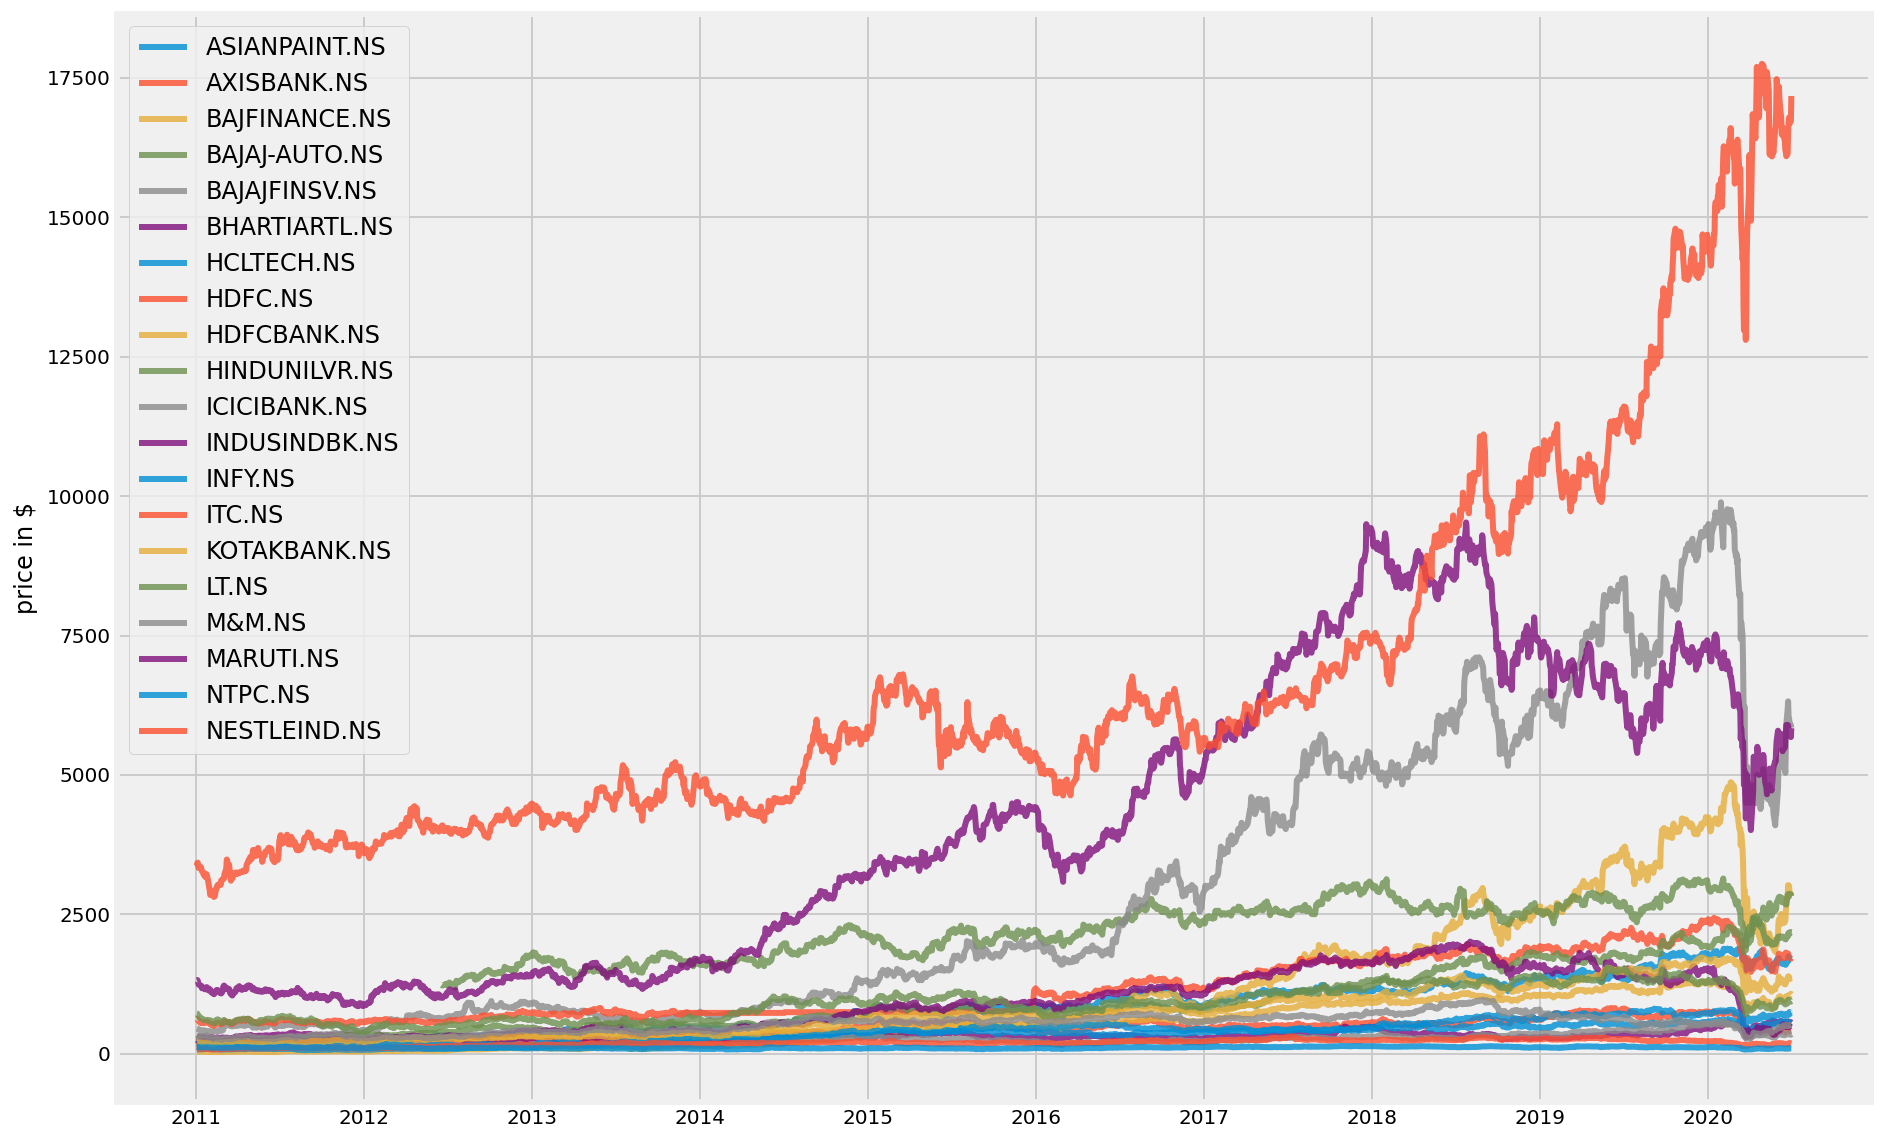

In [7]:
plt.figure(figsize=(14, 10))
for i in data.columns:
    plt.plot(data.index, data[i], lw=3, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

## Daily Return's

Plotting daily returns (percent change compared to the day before). To see the stocks' volatility.

Text(0, 0.5, 'daily returns')

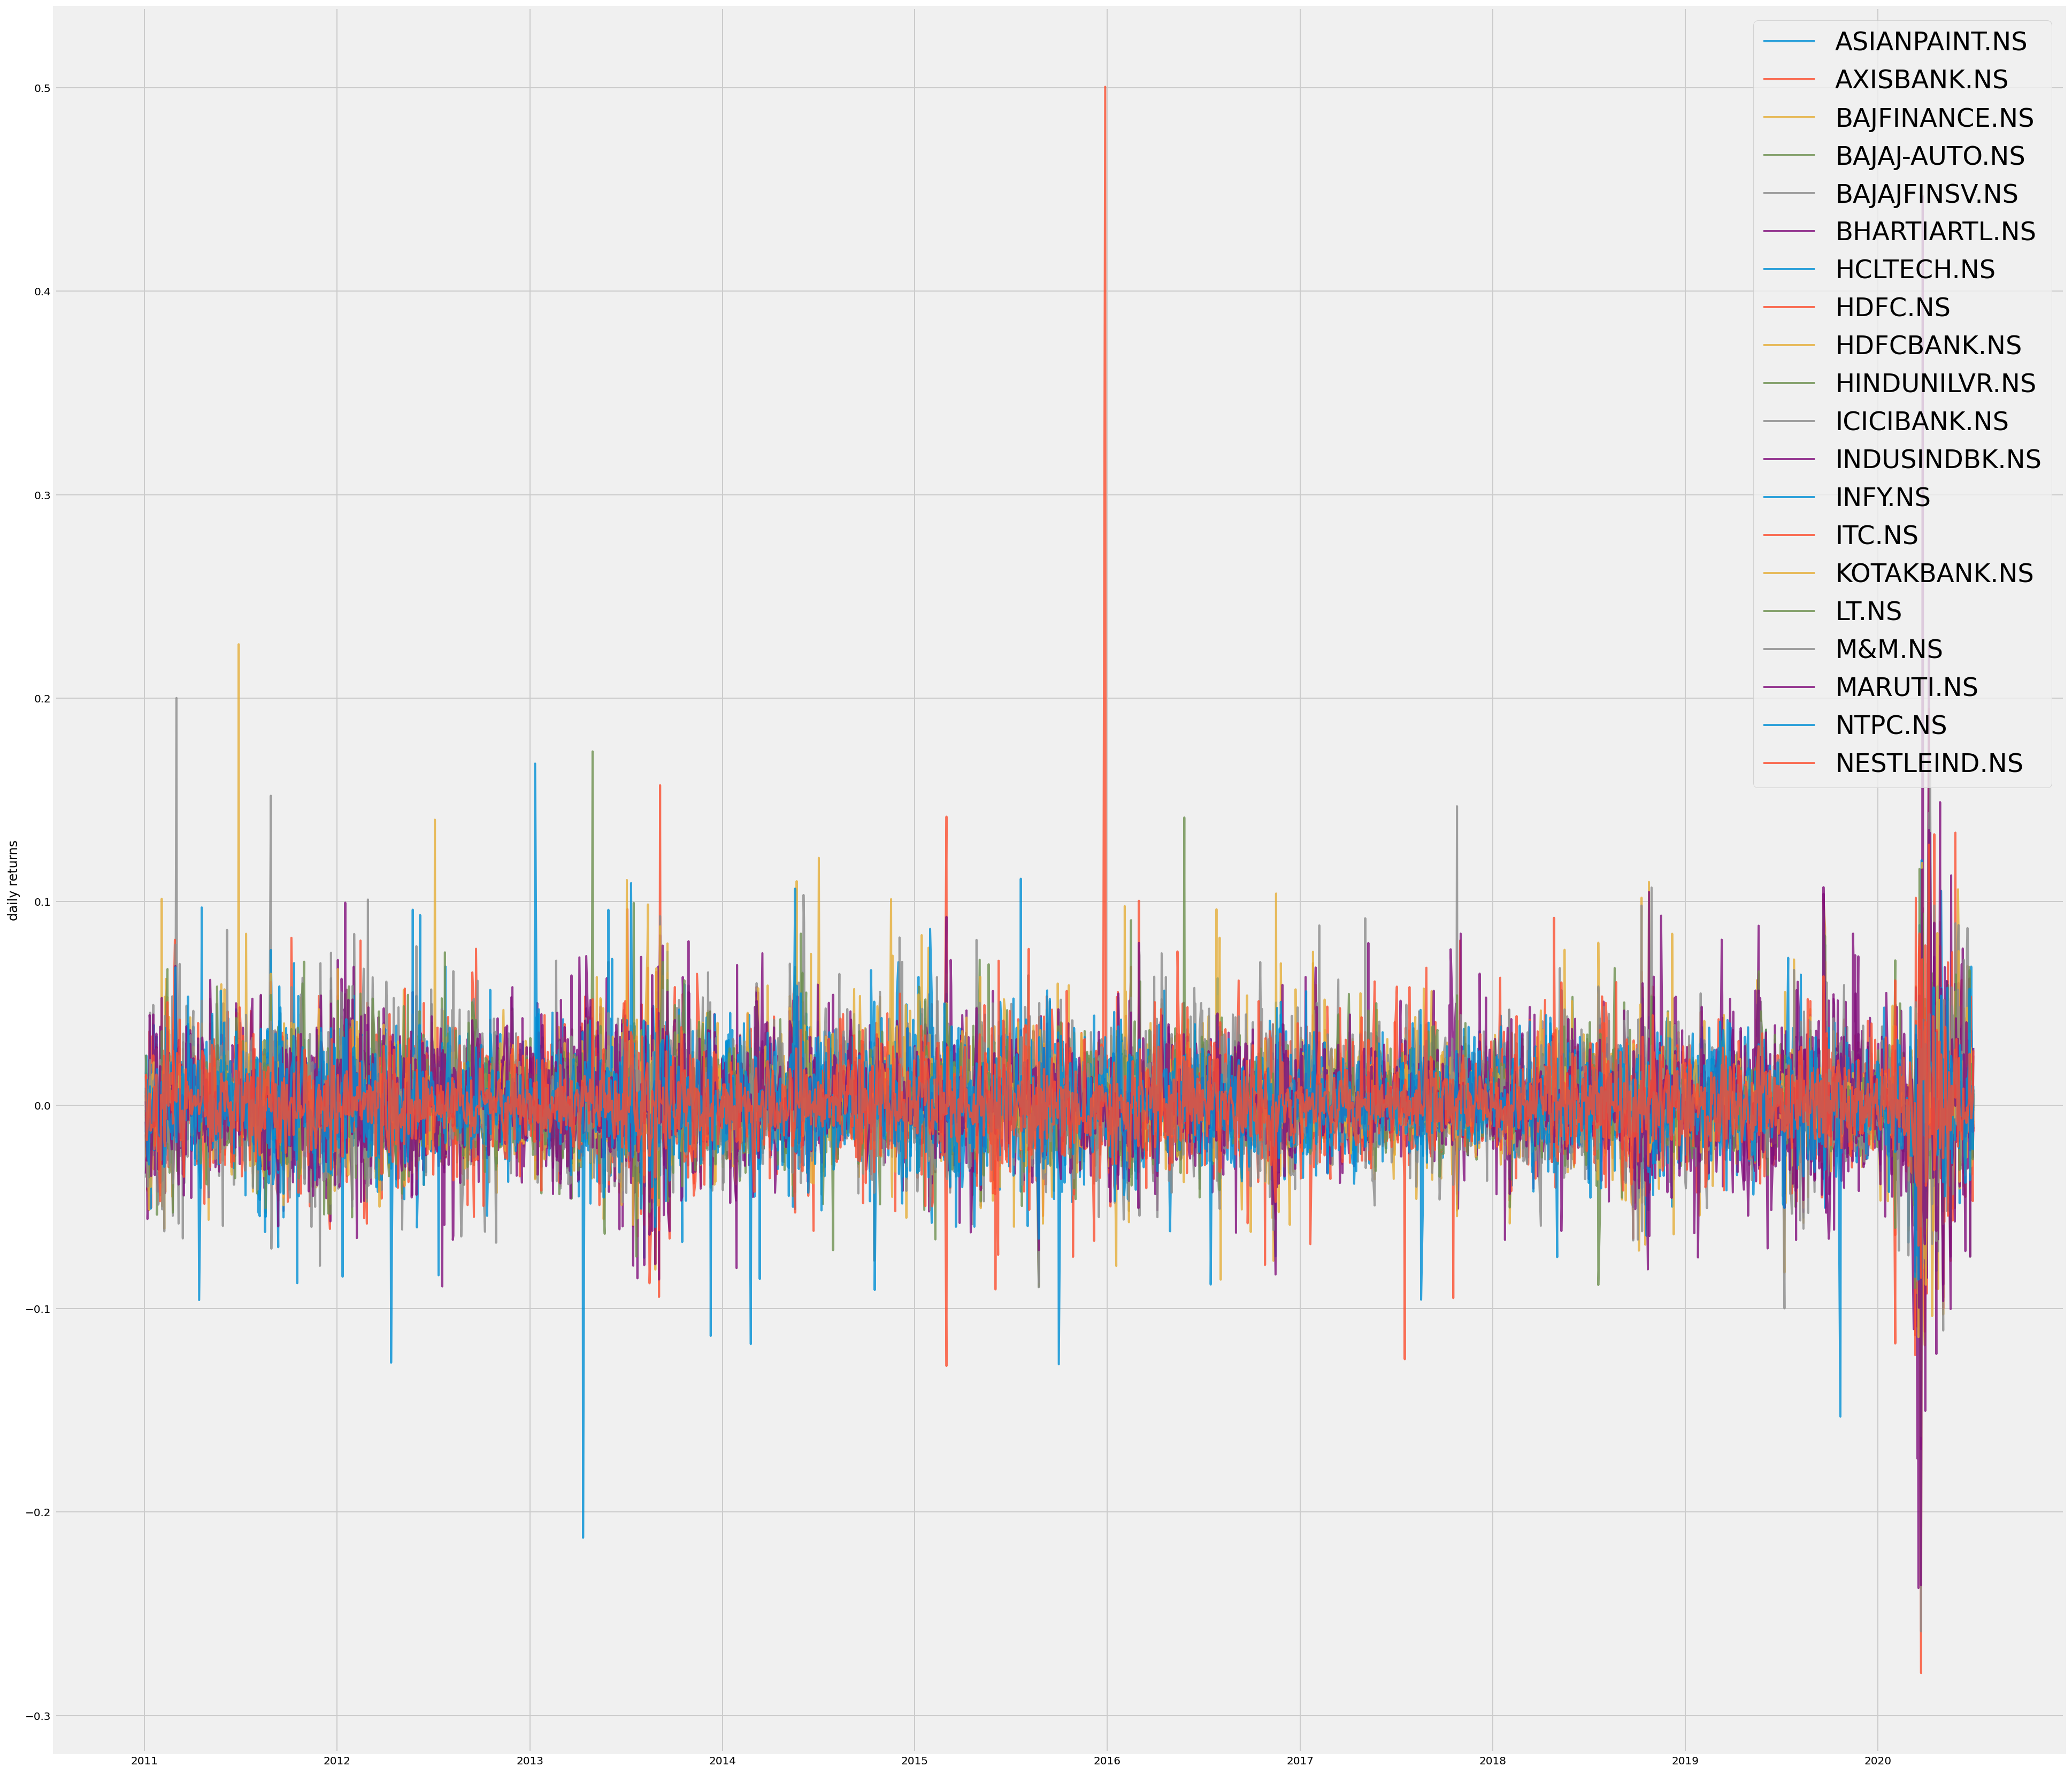

In [8]:
returns = data.pct_change()

plt.figure(figsize=(30, 30))
for i in returns.columns:
    plt.plot(returns.index, returns[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper right', fontsize=24)
plt.ylabel('daily returns')

## Generating Random Portfolios

Let's say we have X stocks in our portfolio. One decision we have to make is how we should allocate our budget to each of stock in our portfolio. If our total budget is 1, then we can decide the weights for each stock, so that the sum of weights will be 1. And the value for weights will be the portion of budget we allocate to a specific stock. For example, if weight is 0.5 for Stock_A, it means that we allocate 50% of our budget to Stock_A.

Following function generates random weights to each stock in the portfolio, then calculate the portfolio's overall annualised returns and annualised volatility.

"portfolio_annual_performance" function will calculate the returns and volatility, and to make it as an annualised calculation I take into account 252 as the number of trading days in one year. "random_portfolios" function will generate portfolios with random weights assigned to each stock, and by passing num_portfolios argument, you can decide how many random portfolios you want to generate

In [9]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [10]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    
    
    for i in range(num_portfolios):
        weights = np.random.random(no_of_stocks_in_your_portofolio)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

Get daily returns by calling pct_change on the data frame with the price data. And the mean daily returns, the covariance matrix of returns are needed to calculate portfolio returns and volatility. Finally, let's generate 25,000 portfolios with random weights assigned to each stock.

## Enter Risk Free Rate Here

In [11]:
risk_free_rate = 0.0647

In [12]:
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 250000

print("Co-Variance matrix for the stocks in our portofolio")
cov_matrix

Co-Variance matrix for the stocks in our portofolio


,ASIANPAINT.NS,AXISBANK.NS,BAJFINANCE.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BHARTIARTL.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NTPC.NS,NESTLEIND.NS
ASIANPAINT.NS,0.000273,0.000124,0.000107,0.000094,0.000100,0.000075,0.000046,0.000085,0.000085,0.000077,0.000117,0.000125,0.000045,0.000062,0.000101,0.000107,0.000090,0.000115,0.000063,0.000071
AXISBANK.NS,0.000124,0.000551,0.000229,0.000127,0.000208,0.000125,0.000086,0.000178,0.000187,0.000077,0.000351,0.000317,0.000095,0.000091,0.000205,0.000257,0.000180,0.000204,0.000137,0.000063
BAJFINANCE.NS,0.000107,0.000229,0.000595,0.000133,0.000272,0.000107,0.000060,0.000163,0.000144,0.000085,0.000203,0.000233,0.000072,0.000088,0.000173,0.000169,0.000154,0.000172,0.000103,0.000072
BAJAJ-AUTO.NS,0.000094,0.000127,0.000133,0.000263,0.000110,0.000089,0.000050,0.000092,0.000092,0.000064,0.000122,0.000143,0.000051,0.000071,0.000098,0.000112,0.000121,0.000135,0.000065,0.000053
BAJAJFINSV.NS,0.000100,0.000208,0.000272,0.000110,0.000497,0.000101,0.000058,0.000136,0.000123,0.000065,0.000181,0.000212,0.000056,0.000082,0.000142,0.000156,0.000139,0.000152,0.000096,0.000065
BHARTIARTL.NS,0.000075,0.000125,0.000107,0.000089,0.000101,0.000428,0.000050,0.000093,0.000091,0.000053,0.000137,0.000137,0.000062,0.000074,0.000093,0.000122,0.000105,0.000098,0.000081,0.000050
HCLTECH.NS,0.000046,0.000086,0.000060,0.000050,0.000058,0.000050,0.000333,0.000067,0.000063,0.000057,0.000089,0.000076,0.000152,0.000053,0.000064,0.000070,0.000077,0.000063,0.000049,0.000052
HDFC.NS,0.000085,0.000178,0.000163,0.000092,0.000136,0.000093,0.000067,0.000374,0.000150,0.000060,0.000180,0.000185,0.000072,0.000092,0.000148,0.000138,0.000125,0.000126,0.000091,0.000045
HDFCBANK.NS,0.000085,0.000187,0.000144,0.000092,0.000123,0.000091,0.000063,0.000150,0.000219,0.000063,0.000179,0.000196,0.000067,0.000080,0.000165,0.000150,0.000121,0.000122,0.000080,0.000045
HINDUNILVR.NS,0.000077,0.000077,0.000085,0.000064,0.000065,0.000053,0.000057,0.000060,0.000063,0.000243,0.000080,0.000096,0.000048,0.000067,0.000077,0.000064,0.000067,0.000077,0.000045,0.000078


The function --display_simulated_ef_with_random-- first, it generates random portfolio and gets the results (portfolio returns, portfolio volatility, portfolio Sharpe ratio) and weights for the corresponding result. Then by locating the one with the highest Sharpe ratio portfolio, it displays maximum Sharpe ratio portfolio as red star sign. And does similar steps for minimum volatility portfolio, and displays it as the green star on the plot. All the randomly generated portfolios will be also plotted with colour map applied to them based on the Sharpe ratio. The bluer, the higher Sharpe ratio.

And for these two optimal portfolios, it will also show how it allocates the budget within the portfolio.

In [13]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.25
Annualised Volatility: 0.18


            ASIANPAINT.NS  AXISBANK.NS  BAJFINANCE.NS  BAJAJ-AUTO.NS  \
allocation            6.7         5.07          12.49           3.06   

            BAJAJFINSV.NS  BHARTIARTL.NS  HCLTECH.NS  HDFC.NS  HDFCBANK.NS  \
allocation          11.48           2.72        7.33     3.32         2.03   

            HINDUNILVR.NS  ICICIBANK.NS  INDUSINDBK.NS  INFY.NS  ITC.NS  \
allocation          11.08          1.86           3.57     8.47    8.47   

            KOTAKBANK.NS  LT.NS  M&M.NS  MARUTI.NS  NTPC.NS  NESTLEIND.NS  
allocation          4.31    0.5    1.05       0.45     1.43          4.62  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.15


            ASIANPAINT.NS  AXISBANK.NS  B

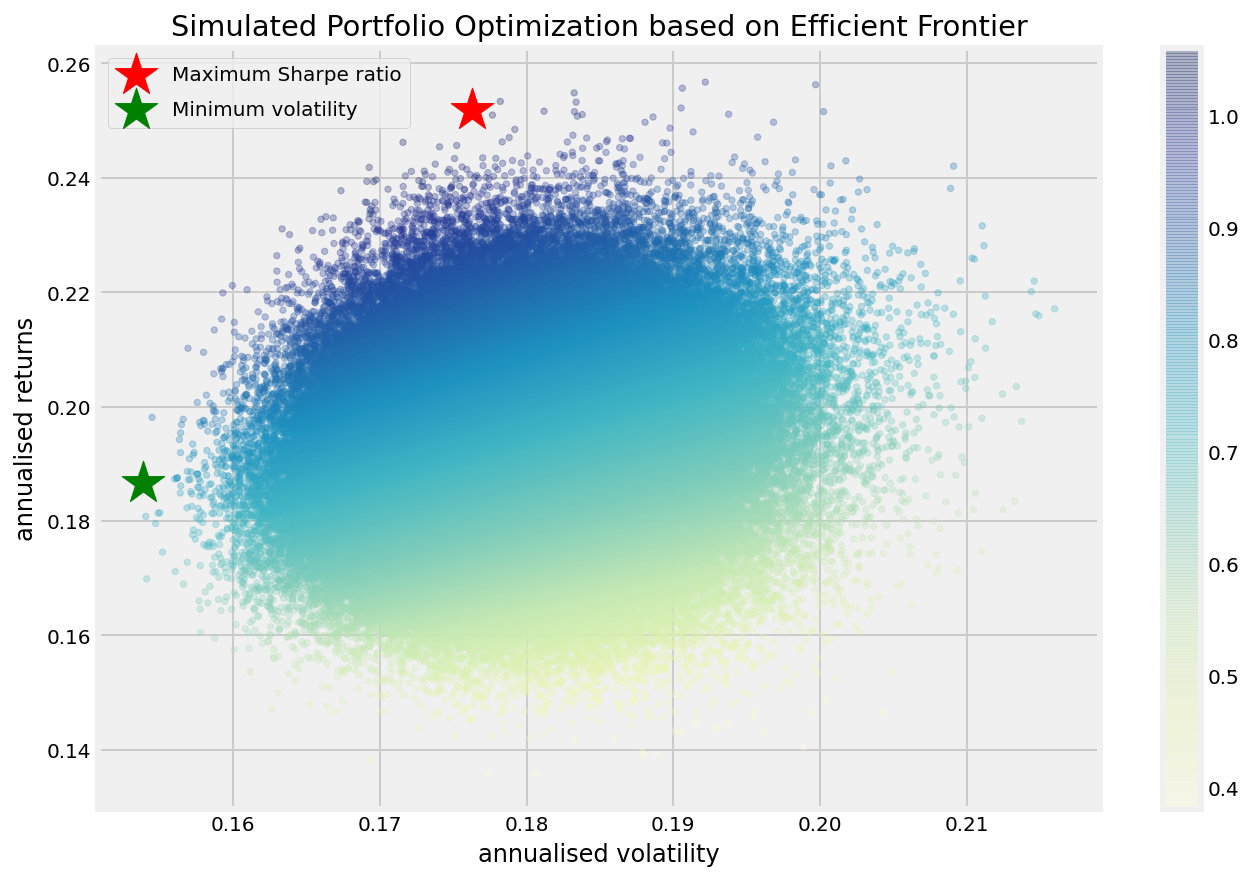

In [14]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

If we are willing to take higher risk for higher return, one that gives us the best risk-adjusted return is the one with maximum Sharpe ratio.

## Efficient Frontier

From the plot of the randomly simulated portfolio, we can see it forms a shape of an arch line on the top of clustered blue dots. This line is called efficient frontier. Why is it efficient? Because points along the line will give you the lowest risk for a given target return. All the other dots right to the line will give you higher risk with same returns. If the expected returns are the same, why would you take an extra risk when there's an option with lower risk?

The way we found the two kinds of optimal portfolio above was by simulating many possible random choices and pick the best ones (either minimum risk or maximum risk-adjusted return). We can also implement this by using Scipy's optimize function.

If you are an advanced Excel user, you might be familiar with 'solver' function in excel. Scipy's optimize function is doing the similar task when given what to optimize, and what are constraints and bounds.

Below functions are to get the maximum Sharpe ratio portfolio. In Scipy's optimize function, there's no 'maximize', so as an objective function you need to pass something that should be minimized. That is why the first "neg_sharpe_ratio" is computing the negative Sharpe ratio. Now we can use this as our objective function to minimize. In "max_sharpe_ratio" function, you first define arguments (this should not include the variables you would like to change for optimisation, in this case, "weights"). At first, the construction of constraints was a bit difficult for me to understand, due to the way it is stated.

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

The above constraint is saying that sum of x should be equal to 1. You can think of the 'fun' part construction as '1' on the right side of equal sign has been moved to the left side of the equal sign.

'np.sum(x) == 1' has become 'np.sum(x)-1'

And what does this mean? It simply means that the sum of all the weights should be equal to 1. You cannot allocate more than 100% of your budget in total.

"bounds" is giving another limit to assign random weights, by saying any weight should be inclusively between 0 and 1. You cannot give minus budget allocation to a stock or more than 100% allocation to a stock.

In [15]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

Defining the optimizing function for calculating minimum volatility portfolio. This time we really do minimize the objective function. What do we want to minimize? We want to minimize volatility by trying different weights. "constraints" and "bounds" are same as the above.

In [16]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

We can also draw a line which depicts where the efficient portfolios for a given risk rate should be. This is called "efficient frontier". Below I define other functions to compute efficient frontier. The first function "efficient_return" is calculating the most efficient portfolio for a given target return, and the second function "efficient_frontier" will take a range of target returns and compute efficient portfolio for each return level.

In [17]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

Plotting the portfolio choice with maximum Sharpe ratio and minimum volatility also with all the randomly generated portfolios. But this time we are not picking the optimal ones from the randomly generated portfolios, but we are actually calculating by using Scipy's 'minimize' function. And the below function will also plot the efficient frontier line.

In [18]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.36
Annualised Volatility: 0.21


            ASIANPAINT.NS  AXISBANK.NS  BAJFINANCE.NS  BAJAJ-AUTO.NS  \
allocation          15.61          0.0           35.9            0.0   

            BAJAJFINSV.NS  BHARTIARTL.NS  HCLTECH.NS  HDFC.NS  HDFCBANK.NS  \
allocation           2.71            0.0       18.76      0.0          0.0   

            HINDUNILVR.NS  ICICIBANK.NS  INDUSINDBK.NS  INFY.NS  ITC.NS  \
allocation          20.27           0.0            0.0      0.0     0.0   

            KOTAKBANK.NS  LT.NS  M&M.NS  MARUTI.NS  NTPC.NS  NESTLEIND.NS  
allocation           0.0    0.0     0.0        0.0      0.0          6.74  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.17
Annualised Volatility: 0.15


            ASIANPAINT.NS  AXISBANK.NS  B

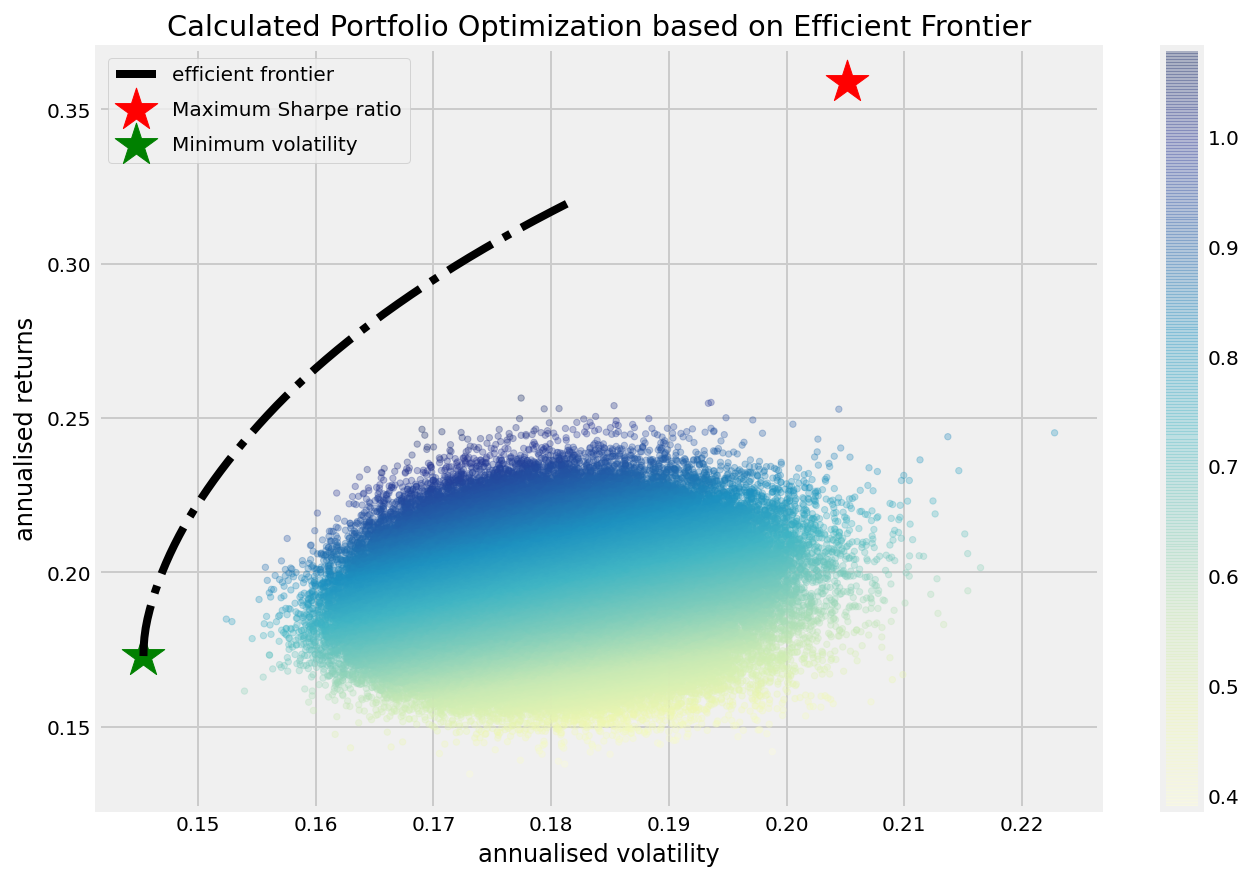

In [19]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

We have almost the same result as what we have simulated by picking from the randomly generated portfolios. There are some differences in the decimal places but more or less same.

Instead of plotting every randomly generated portfolio, we can plot each individual stocks on the plot with the corresponding values of each stock's annual return and annual risk. This way we can see and compare how diversification is lowering the risk by optimising the allocation.

In [20]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(data.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(data.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.36
Annualised Volatility: 0.21


            ASIANPAINT.NS  AXISBANK.NS  BAJFINANCE.NS  BAJAJ-AUTO.NS  \
allocation          15.61          0.0           35.9            0.0   

            BAJAJFINSV.NS  BHARTIARTL.NS  HCLTECH.NS  HDFC.NS  HDFCBANK.NS  \
allocation           2.71            0.0       18.76      0.0          0.0   

            HINDUNILVR.NS  ICICIBANK.NS  INDUSINDBK.NS  INFY.NS  ITC.NS  \
allocation          20.27           0.0            0.0      0.0     0.0   

            KOTAKBANK.NS  LT.NS  M&M.NS  MARUTI.NS  NTPC.NS  NESTLEIND.NS  
allocation           0.0    0.0     0.0        0.0      0.0          6.74  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.17
Annualised Volatility: 0.15


            ASIANPAINT.NS  AXISBANK.NS  B

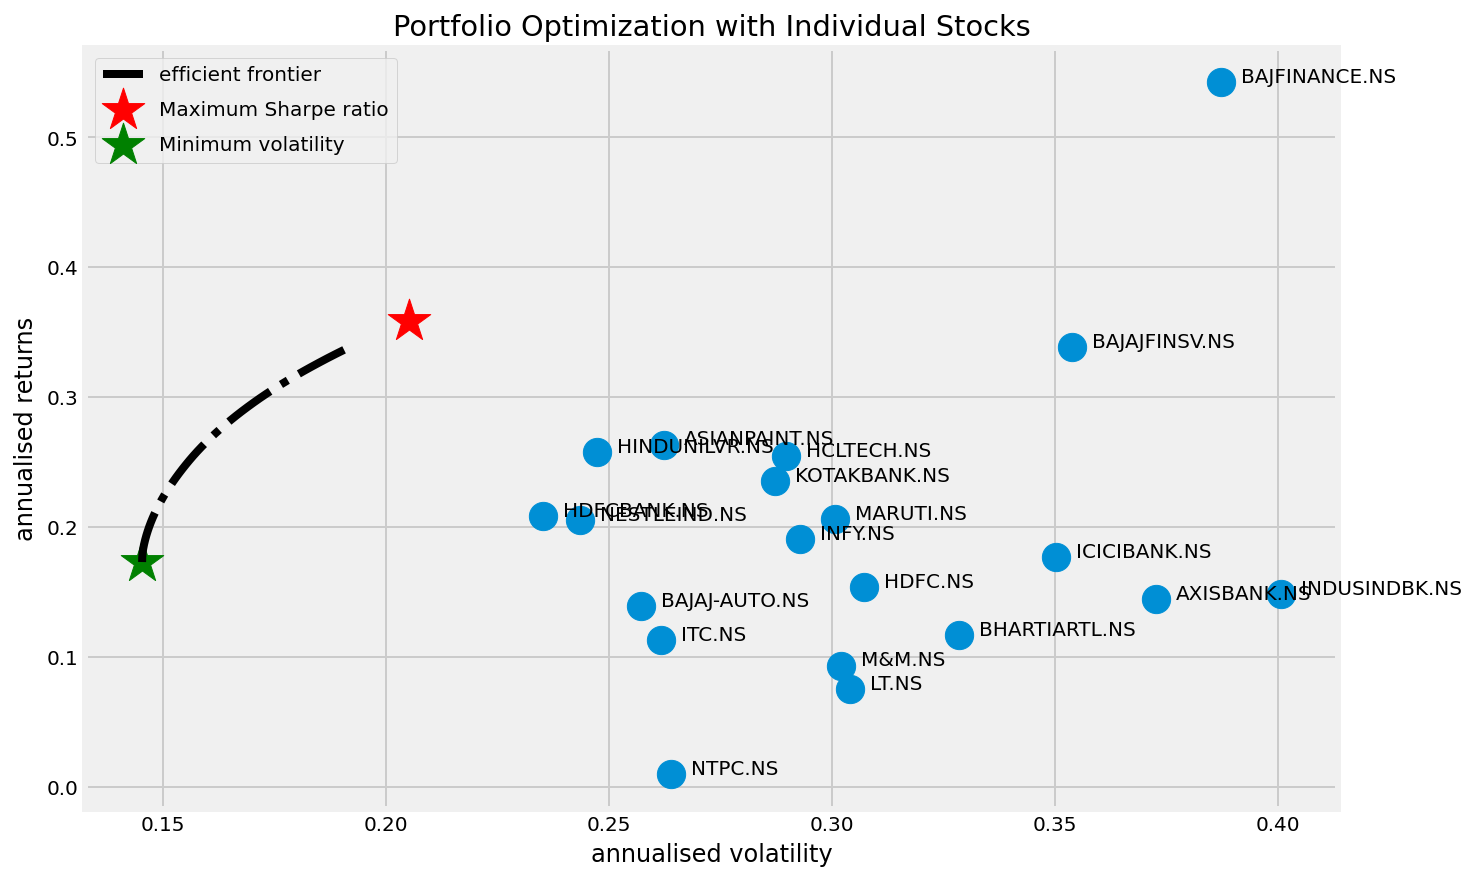

In [21]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

Considering how vast and deep the finance field is, I've probably only scratched the surface. But I had fun going through coding (I found it online and modified it) and trying to understand the concept. And I'm learning every day. After finishing this implementation, I definitely know better than yesterday's me. And if I keep on going and learning, in about a couple of year's time, I will know a whole lot more than today's me. If you have any comments or questions, feel free to leave a comment. Any feedback would be appreciated.